In [1]:
#%load_ext autoreload
#%autoreload 1
#%aimport gams_result

In [2]:
#gams_result.param_as_df(El-aut.gdx)

In [3]:
folder = 'Old_Data/'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
#Colormap
from matplotlib.colors import ListedColormap

#Create custom color palette for generation technologies
colorsList = ['#DA9A2F','#B1B2B4','#76C26A','#c5abe3','#3B9ED8']
techmap = ListedColormap(colorsList)
pv_col = techmap(0)
wind_col = techmap(1)
bm_col = techmap(2)
gt_col = techmap(3)
hydro_col = techmap(4)

In [6]:
#Biomass capacities
bmPlants = pd.read_csv("bmPlants_Grefrath.csv",sep=";",decimal=",")
bmPlants['plantCapacity_kw_el'] = pd.to_numeric(bmPlants['plantCapacity_kw_el'].str.replace(',','.'), errors='coerce')
wte = bmPlants.iloc[6].loc['plantCapacity_kw_el']
wc = bmPlants.iloc[7].loc['plantCapacity_kw_el']
chp2 = bmPlants.iloc[8].loc['plantCapacity_kw_el']
chp3 = bmPlants.iloc[9].loc['plantCapacity_kw_el']
chp4 = bmPlants.iloc[10].loc['plantCapacity_kw_el']

# System Composition

## Autarky VoLL

In [7]:
units = pd.read_csv(folder +"InstalledUnitsAV.csv")
production = pd.read_csv(folder +"YearlyProductionAV.csv")
#production[production['EC']=="el"].groupby(by=['MY','TC_ds']).sum()

In [8]:
units.tail()

,MY,DS_en,TC_ds,Val
1259,2050,4,biomass_WoodyCombustion_1,1.0
1260,2050,4,biomass_BiogasChp_2,0.0
1261,2050,4,biomass_BiogasChp_3,0.0
1262,2050,4,biomass_BiogasChp_4,1.0
1263,2050,4,geothermal,0.0


### Capacity

In [9]:
#Converting number of units to installed capacities
units.loc[units['TC_ds'].str.contains('PV'),'Val'] = units['Val']*0.26 # A PV unit has a capacity of 0.26 kW
units.loc[units['TC_ds'].str.contains('WasteToEnergy'),'Val'] =  units['Val']*wte
units.loc[units['TC_ds'].str.contains('WoodyCombustion'),'Val'] =  units['Val']*wc
units.loc[units['TC_ds'].str.contains('Chp_2'),'Val'] =  units['Val']*chp2
units.loc[units['TC_ds'].str.contains('Chp_3'),'Val'] =  units['Val']*chp3
units.loc[units['TC_ds'].str.contains('Chp_4'),'Val'] =  units['Val']*chp4

In [10]:
pv_cap = units[units['TC_ds'].str.contains("PV")].groupby(by='MY').Val.sum()
#The values below need to be multiplied by coefficients to approximate the installed capacity
gt_cap = units[units['TC_ds'].str.contains("geothermal")].groupby(by='MY').Val.sum() 
wind_cap = units[units['TC_ds'].str.contains("wind")].groupby(by='MY').Val.sum()*1600 #multiply to get installed capacity as kW (typically 1600 or 1620kW)
bm_cap = units[units['TC_ds'].str.contains("biomass")].groupby(by='MY').Val.sum()
hydro_cap = units[units['TC_ds'].str.contains("hydro")].groupby(by='MY').Val.sum()
tot_capAV = pd.DataFrame({'PV':pv_cap, 'wind':wind_cap, 'biomass':bm_cap,'geothermal':gt_cap,'hydro':hydro_cap}).fillna(0)
total_cap = units.groupby(by=['MY']).Val.sum()

### Generation

In [11]:
#Filter by "el", aggregate if str.contains
pv_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("PV"))].groupby(by=['MY']).Val.sum()
gt_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("geothermal"))].groupby(by=['MY']).Val.sum()
wind_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("wind"))].groupby(by=['MY']).Val.sum()
bm_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("biomass"))].groupby(by=['MY']).Val.sum()
hydro_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("hydro"))].groupby(by=['MY']).Val.sum()
tot_genAV = pd.DataFrame({'PV':pv_gen, 'wind':wind_gen, 'biomass':bm_gen,'geothermal':gt_gen,'hydro':hydro_gen}).fillna(0)
total_gen = production[production['EC']=="el"].groupby(by=['MY']).Val.sum()

### Figures

<AxesSubplot:xlabel='MY'>

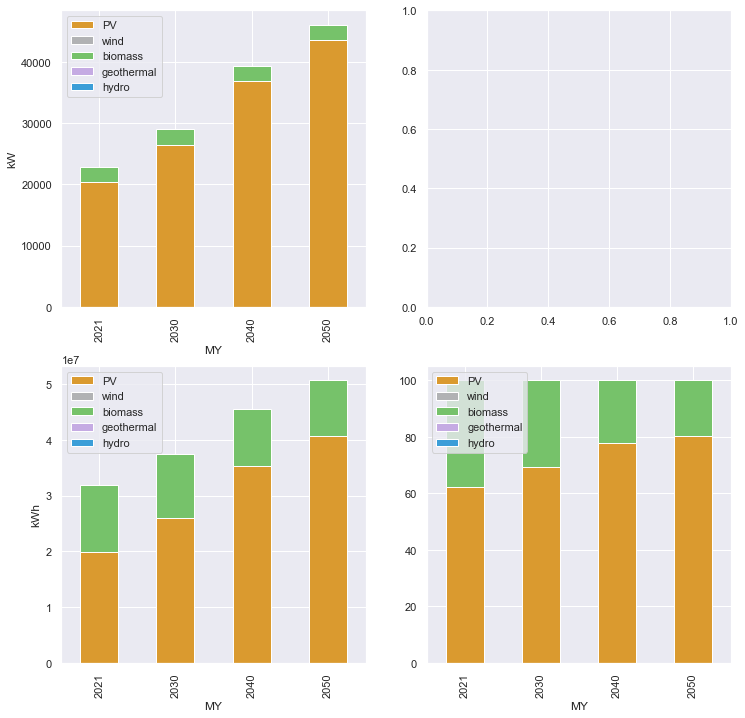

In [12]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
#Total installed capacities
tot_capAV.plot(ax=ax[0,0],kind='bar',stacked=True,cmap=techmap)
ax[0,0].set_ylabel('kW')
#Total generation by year
tot_genAV.plot(ax=ax[1,0],kind='bar',stacked=True,cmap=techmap)
ax[1,0].set_ylabel('kWh')
#Generation mix by year
(100*tot_genAV.T/tot_genAV.T.sum()).T.plot(ax=ax[1,1],kind='bar',stacked=True,cmap=techmap)

## Baseline

In [13]:
units = pd.read_csv(folder +"InstalledUnitsBL.csv")
production = pd.read_csv(folder +"YearlyProductionBL.csv")
#production[production['EC']=="el"].groupby(by=['MY','TC_ds']).sum()

In [14]:
units.tail()

,MY,DS_en,TC_ds,Val
1259,2050,4,biomass_WoodyCombustion_1,1.0
1260,2050,4,biomass_BiogasChp_2,0.0
1261,2050,4,biomass_BiogasChp_3,0.0
1262,2050,4,biomass_BiogasChp_4,0.0
1263,2050,4,geothermal,0.0


### Capacity

In [15]:
#Converting number of units to installed capacities
units.loc[units['TC_ds'].str.contains('PV'),'Val'] = units['Val']*0.26 # A PV unit has a capacity of 0.26 kW
units.loc[units['TC_ds'].str.contains('WasteToEnergy'),'Val'] =  units['Val']*wte
units.loc[units['TC_ds'].str.contains('WoodyCombustion'),'Val'] =  units['Val']*wc
units.loc[units['TC_ds'].str.contains('Chp_2'),'Val'] =  units['Val']*chp2
units.loc[units['TC_ds'].str.contains('Chp_3'),'Val'] =  units['Val']*chp3
units.loc[units['TC_ds'].str.contains('Chp_4'),'Val'] =  units['Val']*chp4

In [16]:
pv_cap = units[units['TC_ds'].str.contains("PV")].groupby(by='MY').Val.sum()
#The values below need to be multiplied by coefficients to approximate the installed capacity
gt_cap = units[units['TC_ds'].str.contains("geothermal")].groupby(by='MY').Val.sum() 
wind_cap = units[units['TC_ds'].str.contains("wind")].groupby(by='MY').Val.sum()*1600 #multiply to get installed capacity as kW (typically 1600 or 1620kW)
bm_cap = units[units['TC_ds'].str.contains("biomass")].groupby(by='MY').Val.sum()
hydro_cap = units[units['TC_ds'].str.contains("hydro")].groupby(by='MY').Val.sum()
tot_capBL = pd.DataFrame({'PV':pv_cap, 'wind':wind_cap, 'biomass':bm_cap,'geothermal':gt_cap,'hydro':hydro_cap}).fillna(0)
total_cap = units.groupby(by=['MY']).Val.sum()

### Generation

In [17]:
#Filter by "el", aggregate if str.contains
pv_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("PV"))].groupby(by=['MY']).Val.sum()
gt_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("geothermal"))].groupby(by=['MY']).Val.sum()
wind_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("wind"))].groupby(by=['MY']).Val.sum()
bm_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("biomass"))].groupby(by=['MY']).Val.sum()
hydro_gen = production[(production['EC']=="el")&(production['TC_ds'].str.contains("hydro"))].groupby(by=['MY']).Val.sum()
tot_genBL = pd.DataFrame({'PV':pv_gen, 'wind':wind_gen, 'biomass':bm_gen,'geothermal':gt_gen,'hydro':hydro_gen}).fillna(0)
total_gen = production[production['EC']=="el"].groupby(by=['MY']).Val.sum()

### Figures

<AxesSubplot:xlabel='MY'>

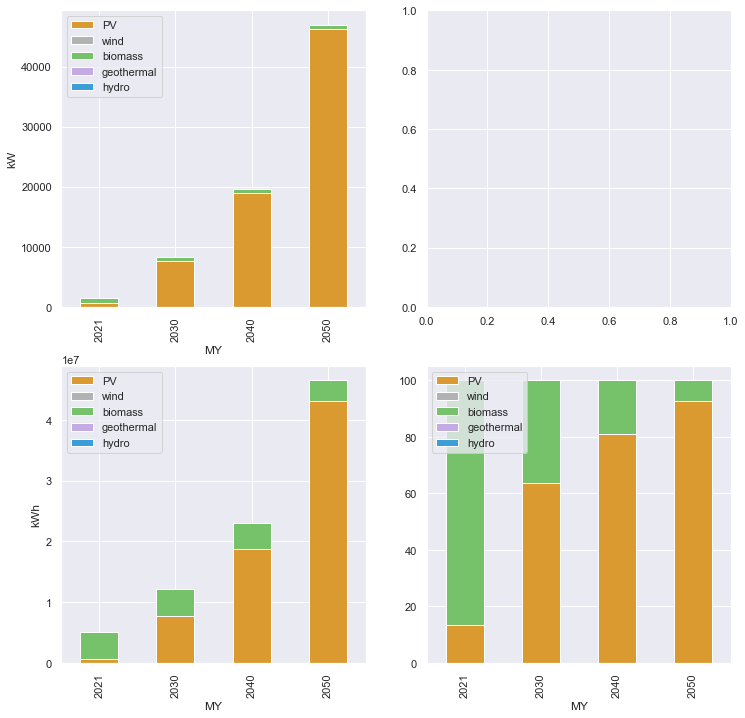

In [18]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
#Total installed capacities
tot_capBL.plot(ax=ax[0,0],kind='bar',stacked=True,cmap=techmap)
ax[0,0].set_ylabel('kW')
#Total generation by year
tot_genBL.plot(ax=ax[1,0],kind='bar',stacked=True,cmap=techmap)
ax[1,0].set_ylabel('kWh')
#Generation mix by year
(100*tot_genBL.T/tot_genBL.T.sum()).T.plot(ax=ax[1,1],kind='bar',stacked=True,cmap=techmap)

# Timeseries

In [19]:
season_labs = ['Spring 2021', 'Summer 2021', 'Fall 2021', 'Winter 2021', 'Spring 2030', 'Summer 2030', 'Fall 2030', 'Winter 2030']
#season_labs_2050 = ['Spring 2021', 'Summer 2021', 'Fall 2021', 'Winter 2021', 'Spring 2030', 'Summer 2030', 'Fall 2030', 'Winter 2030','Spring 2040', 'Summer 2040', 'Fall 2040', 'Winter 2040', 'Spring 2050', 'Summer 2050', 'Fall 2050', 'Winter 2050']
#season_labs_2050 = ['Summer 2021', 'Winter 2021', 'Summer 2030','Winter 2030', 'Summer 2040', 'Winter 2040', 'Summer 2050', 'Winter 2050']
#season_ticks_2050 = ['2021_su_wd_1','2021_wi_wd_1','2030_su_wd_1','2030_wi_wd_1','2040_su_wd_1','2040_wi_wd_1','2050_su_wd_1','2050_wi_wd_1']

### Loading data

In [20]:
#Get hourly index
elSurplus = pd.read_csv(folder +"ElectricitySurplus.csv")
elSurplus[['season','day','hour']]=elSurplus['TS'].str.split('_',expand=True) #separate into columns for grouping analysis
elSurplus['TS'] = elSurplus['MY'].astype(str) + "_" + elSurplus['TS'] #combine for y-axis ticks
elSurplus['hour'] = elSurplus['hour'].astype('int64')
elSurplusVal = elSurplus[['MY','TS','Val']]
elSurplus.drop('Val',axis=1, inplace=True)
ts = (elSurplus['season']+"_"+elSurplus['day']+"_"+elSurplus['hour'].astype(str)).iloc[:108]

#fig, ax=plt.subplots()
#ax = sns.boxplot(x='MY',y='Val',data=elSurplusVal)
#ax.set_ylabel('kWh')

In [21]:
storage = pd.read_csv(folder +"StorageFlowsBL.csv")
storage['TS'] = storage['MY'].astype(str) + "_" + storage['TS']
elStorage = elSurplus
elStorageBL = pd.merge(elStorage, storage[['TS','Val']], on='TS',how='left').fillna(0).set_index('TS')

In [22]:
storage = pd.read_csv(folder +"StorageFlowsA.csv")
storage['TS'] = storage['MY'].astype(str) + "_" + storage['TS']
elStorage = elSurplus
elStorageA = pd.merge(elStorage, storage[['TS','Val']], on='TS',how='left').fillna(0).set_index('TS')

In [23]:
storage = pd.read_csv(folder +"StorageFlowsAV.csv")
storage['TS'] = storage['MY'].astype(str) + "_" + storage['TS']
elStorage = elSurplus
elStorageAV = pd.merge(elStorage, storage[['TS','Val']], on='TS',how='left').fillna(0).set_index('TS')

In [24]:
imports = pd.read_csv(folder +"ImportFlowsBL.csv")
#imports.groupby(by=["MY","TS"]).sum()
imports['TS'] = imports['MY'].astype(str) + "_" + imports['TS'] #combine for y-axis ticks - careful since overwriting!
elImports = elSurplus
elImports = pd.merge(elImports,imports[imports['EC']=="el"][['TS','Val']],on="TS",how='left').fillna(0)

In [25]:
LL = pd.read_excel(folder +"VollLostLoadAV.xlsx")
LL = pd.melt(LL,id_vars=['Unnamed: 0']).rename(columns={"Unnamed: 0":"MY","variable":"TS","value":"Val"})
LL['TS'] = LL['MY'].astype(str) + "_" + LL['TS']
LostLoad = elSurplus
LostLoad = pd.merge(LostLoad, LL[['TS','Val']], on='TS',how='left').fillna(0)

### Overview

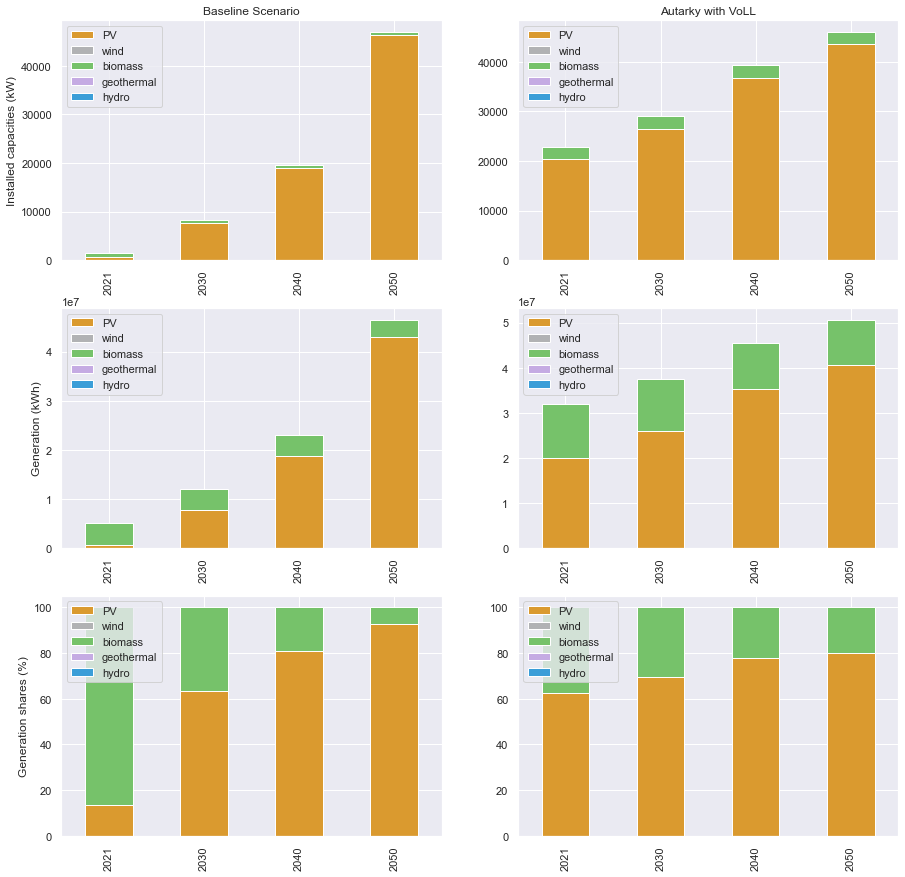

In [27]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
#Installed capacities
tot_capBL.plot(ax=ax[0,0],kind='bar',stacked=True,cmap=techmap)
tot_capAV.plot(ax=ax[0,1],kind='bar',stacked=True,cmap=techmap)

#Generation
tot_genBL.plot(ax=ax[1,0],kind='bar',stacked=True,cmap=techmap)
tot_genAV.plot(ax=ax[1,1],kind='bar',stacked=True,cmap=techmap)

#Generation mix
(100*tot_genBL.T/tot_genBL.T.sum()).T.plot(ax=ax[2,0],kind='bar',stacked=True,cmap=techmap)
(100*tot_genAV.T/tot_genAV.T.sum()).T.plot(ax=ax[2,1],kind='bar',stacked=True,cmap=techmap)

ax[0,0].set_title('Baseline Scenario')
ax[0,0].set_ylabel('Installed capacities (kW)')
ax[0,1].set_title('Autarky with VoLL')
ax[1,0].set_ylabel('Generation (kWh)')
ax[2,0].set_ylabel('Generation shares (%)')


for ax in ax.flat:
    ax.set_xlabel(None)

<AxesSubplot:xlabel='MY', ylabel='Val'>

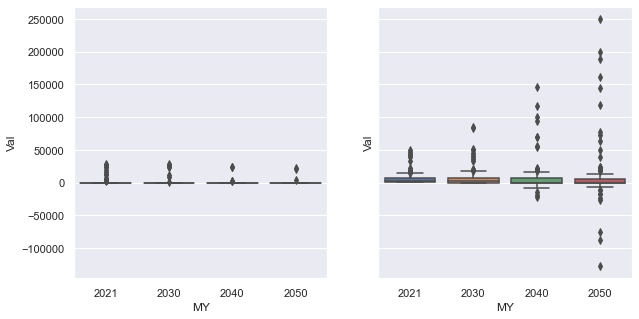

In [28]:
fig, ax=plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.boxplot(x='MY',y='Val',data=LostLoad,ax=ax[0])
sns.boxplot(x='MY',y='Val',data=elImports,ax=ax[1])


Text(0.5, 1.0, 'Autarky with VoLL')

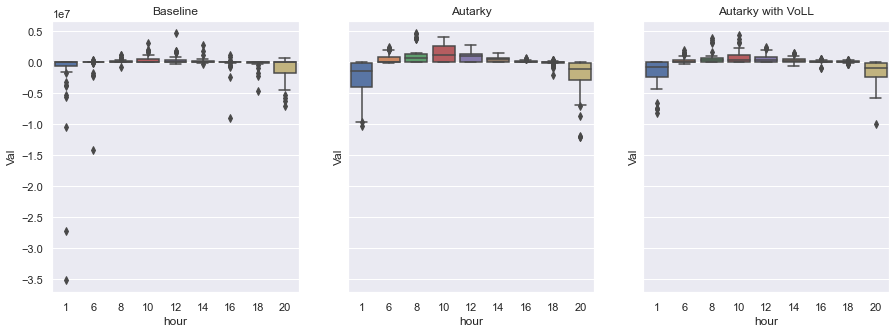

In [29]:
#Use of storage between scenarios
fig, ax=plt.subplots(1,3,figsize=(15,5), sharey=True)
sns.boxplot(x='hour',y='Val',data=elStorageBL, ax=ax[0])
sns.boxplot(x='hour',y='Val',data=elStorageA, ax=ax[1])
sns.boxplot(x='hour',y='Val',data=elStorageAV, ax=ax[2])

ax[0].set_title("Baseline")
ax[1].set_title("Autarky")
ax[2].set_title("Autarky with VoLL")

#elStorageBL.groupby('hour').describe().Val

Text(0.5, 1.0, 'Imports by season')

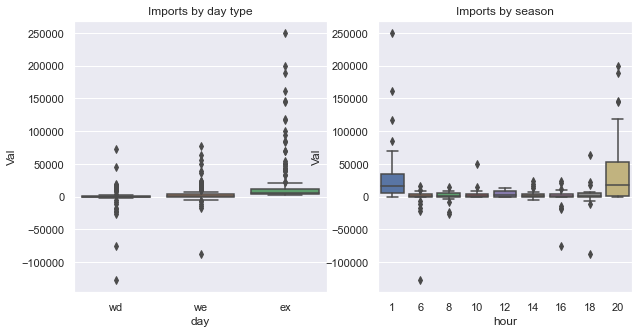

In [30]:
#Timing of imports
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='day',y='Val',data=elImports, ax=ax[0])
sns.boxplot(x='hour',y='Val',data=elImports, ax=ax[1])

ax[0].set_title("Imports by day type")
ax[1].set_title("Imports by season")
#elImports.groupby(by='season').Val.describe()

Text(0.5, 1.0, 'Lost Load by season')

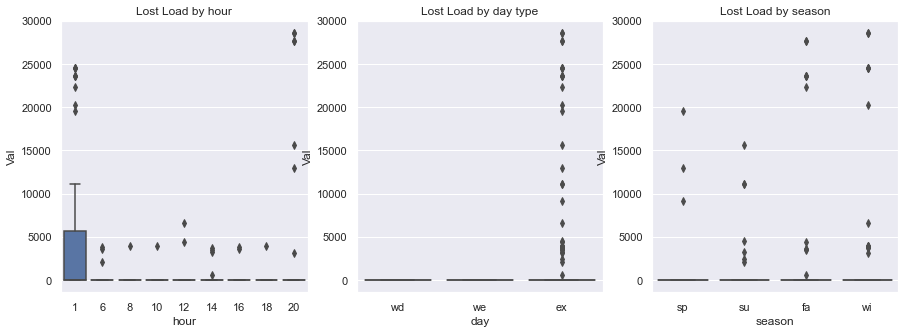

In [31]:
#Timing of Lost Load
fig, ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x='hour',y='Val',data=LostLoad,ax=ax[0])
sns.boxplot(x='day',y='Val',data=LostLoad,ax=ax[1])
sns.boxplot(x='season',y='Val',data=LostLoad,ax=ax[2])

ax[0].set_title("Lost Load by hour")
ax[1].set_title("Lost Load by day type")
ax[2].set_title("Lost Load by season")

#LostLoad.groupby('hour')['Val'].describe()

In [32]:
LostLoad[LostLoad['Val']>0]

,MY,TS,season,day,hour,Val
18,2021,2021_sp_ex_1,sp,ex,1,19605.802904
26,2021,2021_sp_ex_20,sp,ex,20,12923.969722
45,2021,2021_su_ex_1,su,ex,1,11127.211792
46,2021,2021_su_ex_6,su,ex,6,2072.906841
50,2021,2021_su_ex_14,su,ex,14,3264.479024
53,2021,2021_su_ex_20,su,ex,20,15662.873528
72,2021,2021_fa_ex_1,fa,ex,1,23577.622109
73,2021,2021_fa_ex_6,fa,ex,6,3623.171817
76,2021,2021_fa_ex_12,fa,ex,12,4334.364404
77,2021,2021_fa_ex_14,fa,ex,14,3503.162563


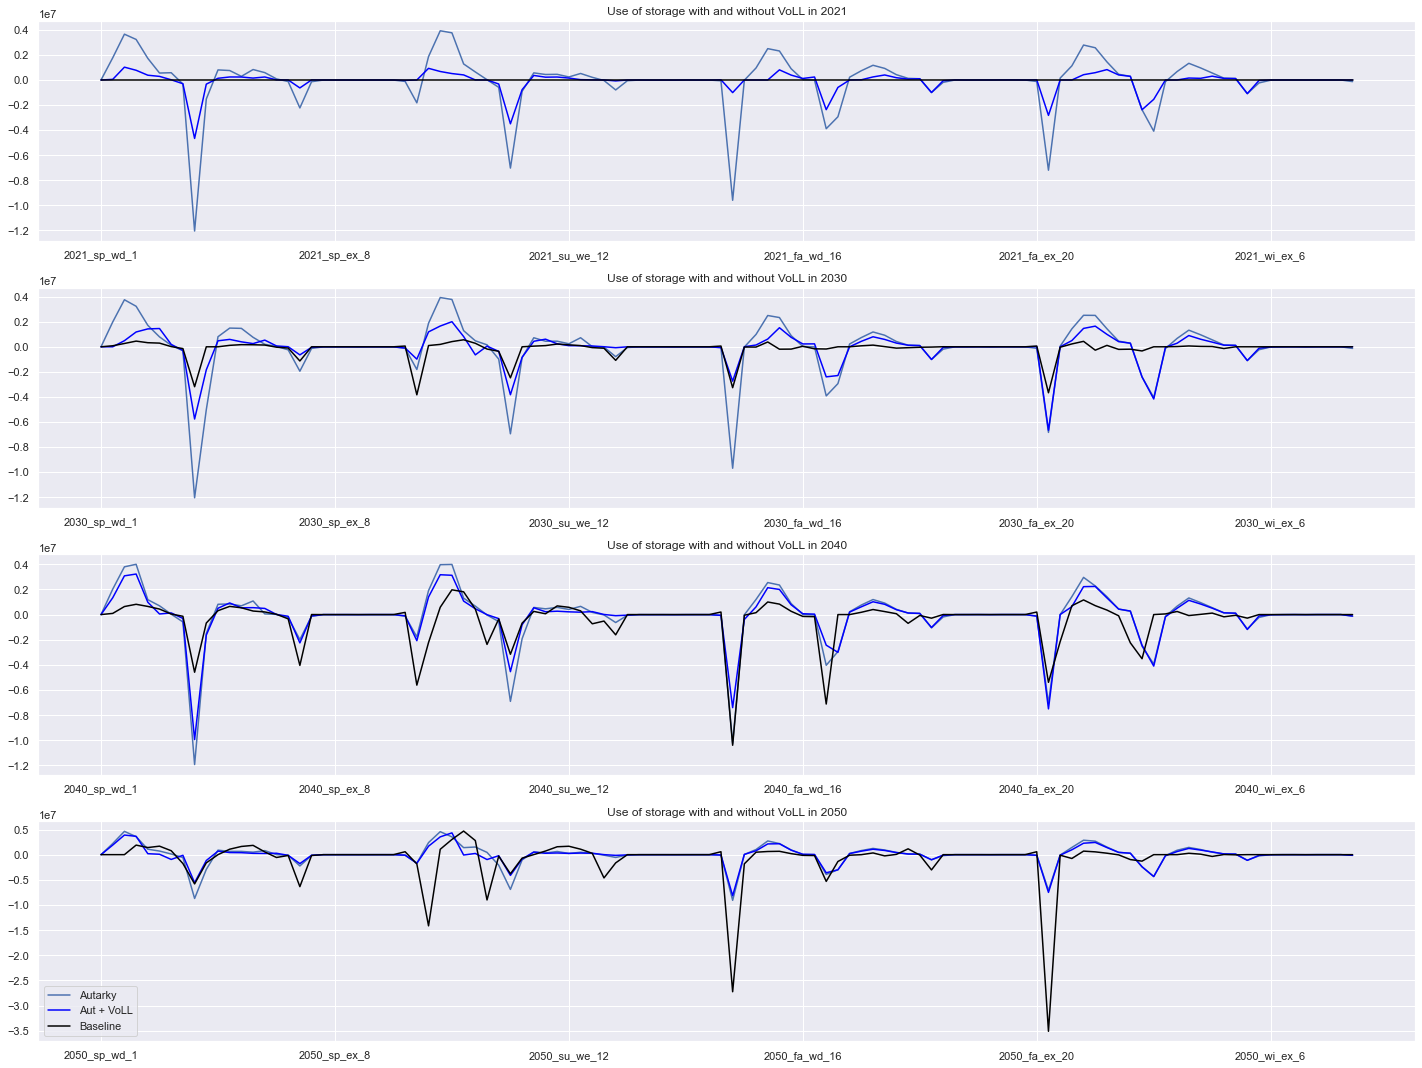

In [33]:
#Comparing the use of electricitiy storage across the different scenarios

fig,axes=plt.subplots(4,1,figsize=(20,15)) 
elStorageA[elStorageA['MY']==2021]['Val'].plot(ax=axes[0],label='Autarky')
elStorageAV[elStorageAV['MY']==2021]['Val'].plot(ax=axes[0],color='blue',label='Aut + VoLL')
elStorageBL[elStorageBL['MY']==2021]['Val'].plot(ax=axes[0],color='black',label='Baseline')

elStorageA[elStorageA['MY']==2030]['Val'].plot(ax=axes[1],label='Autarky')
elStorageAV[elStorageAV['MY']==2030]['Val'].plot(ax=axes[1],color='blue',label='Aut + VoLL')
elStorageBL[elStorageBL['MY']==2030]['Val'].plot(ax=axes[1],color='black',label='Baseline')

elStorageA[elStorageA['MY']==2040]['Val'].plot(ax=axes[2],label='Autarky')
elStorageAV[elStorageAV['MY']==2040]['Val'].plot(ax=axes[2],color='blue',label='Aut + VoLL')
elStorageBL[elStorageBL['MY']==2040]['Val'].plot(ax=axes[2],color='black',label='Baseline')

elStorageA[elStorageA['MY']==2050]['Val'].plot(ax=axes[3],label='Autarky')
elStorageAV[elStorageAV['MY']==2050]['Val'].plot(ax=axes[3],color='blue',label='Aut + VoLL')
elStorageBL[elStorageBL['MY']==2050]['Val'].plot(ax=axes[3],color='black',label='Baseline')

plt.legend()
axes[0].set_title("Use of storage with and without VoLL in 2021")
axes[1].set_title("Use of storage with and without VoLL in 2030")
axes[2].set_title("Use of storage with and without VoLL in 2040")
axes[3].set_title("Use of storage with and without VoLL in 2050")

for ax in axes.flat:
    #ax.set_xticklabels(ts, rotation=0)
    ax.set_xlabel(None)
plt.tight_layout()

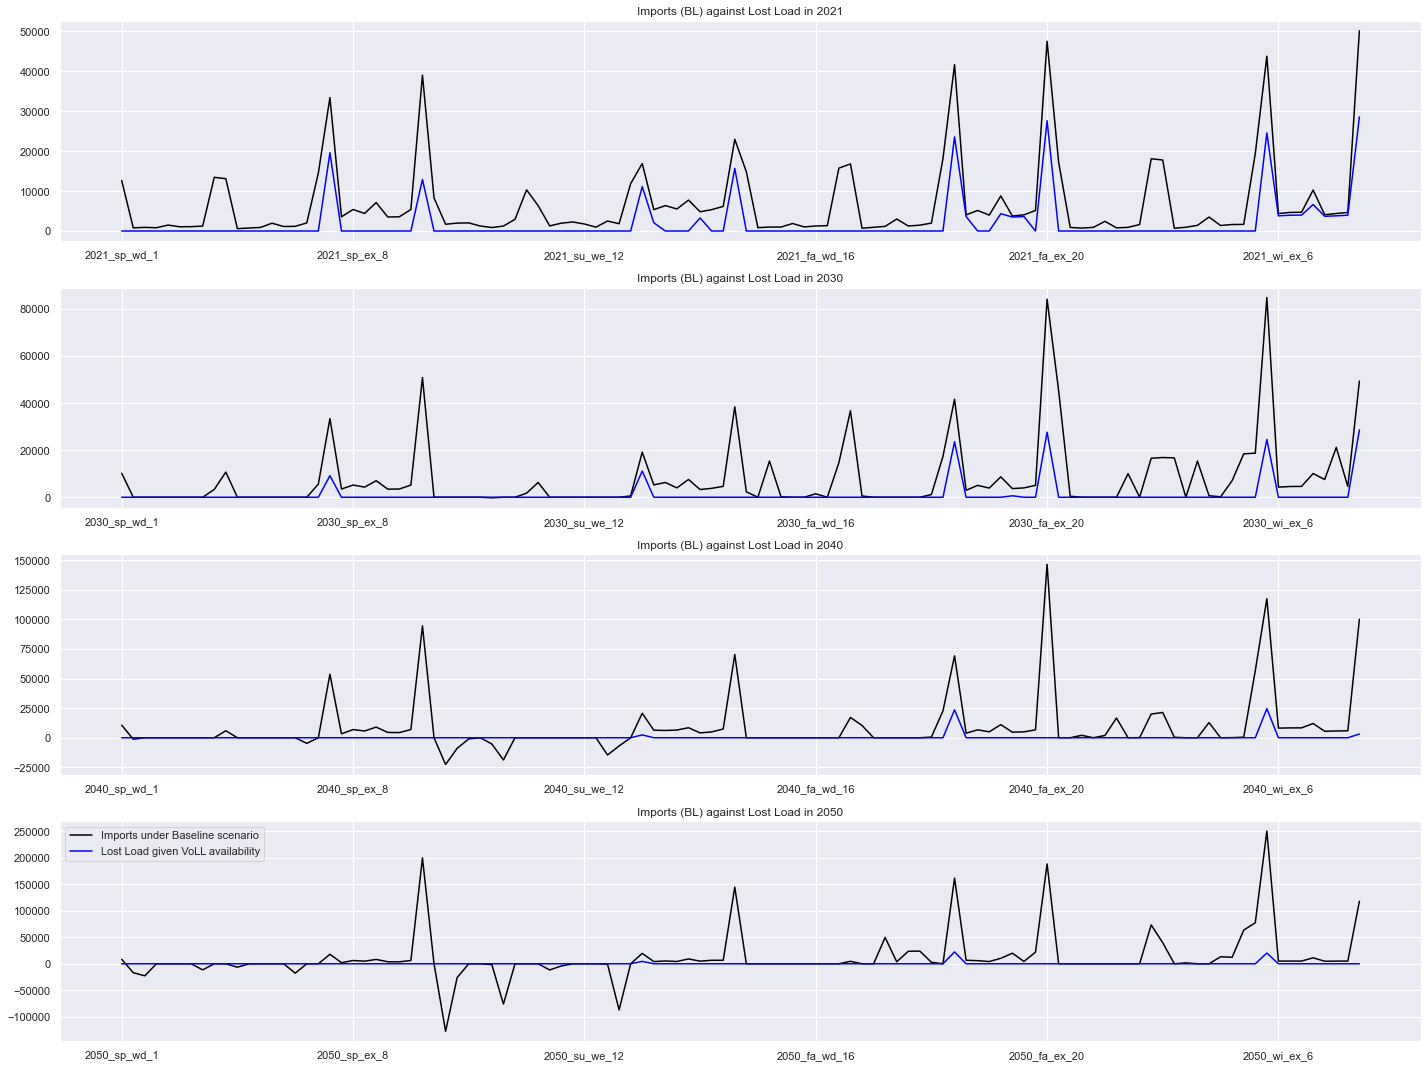

In [34]:
#Comparing the use of imports in the Baseline scenario against the timing of Lost Load in the Autarky scenario

fig,axes=plt.subplots(4,1,figsize=(20,15)) 
elImports[elImports['MY']==2021].set_index('TS')['Val'].plot(ax=axes[0],color='black', label='Imports under Baseline scenario')
LostLoad[LostLoad['MY']==2021].set_index('TS')['Val'].plot(ax=axes[0],color='blue', label='Lost Load given VoLL availability')

elImports[elImports['MY']==2030].set_index('TS')['Val'].plot(ax=axes[1],color='black', label='Imports under Baseline scenario')
LostLoad[LostLoad['MY']==2030].set_index('TS')['Val'].plot(ax=axes[1],color='blue', label='Lost Load given VoLL availability')

elImports[elImports['MY']==2040].set_index('TS')['Val'].plot(ax=axes[2],color='black', label='Imports under Baseline scenario')
LostLoad[LostLoad['MY']==2040].set_index('TS')['Val'].plot(ax=axes[2],color='blue', label='Lost Load given VoLL availability')

elImports[elImports['MY']==2050].set_index('TS')['Val'].plot(ax=axes[3],color='black', label='Imports under Baseline scenario')
LostLoad[LostLoad['MY']==2050].set_index('TS')['Val'].plot(ax=axes[3],color='blue', label='Lost Load given VoLL availability')

plt.legend()
axes[0].set_title("Imports (BL) against Lost Load in 2021")
axes[1].set_title("Imports (BL) against Lost Load in 2030")
axes[2].set_title("Imports (BL) against Lost Load in 2040")
axes[3].set_title("Imports (BL) against Lost Load in 2050")

for ax in axes.flat:
    #ax.set_xticklabels(ts, rotation=0)
    ax.set_xlabel(None)
plt.tight_layout()

In [35]:
LostLoad[LostLoad['Val']>0].head()

,MY,TS,season,day,hour,Val
18,2021,2021_sp_ex_1,sp,ex,1,19605.802904
26,2021,2021_sp_ex_20,sp,ex,20,12923.969722
45,2021,2021_su_ex_1,su,ex,1,11127.211792
46,2021,2021_su_ex_6,su,ex,6,2072.906841
50,2021,2021_su_ex_14,su,ex,14,3264.479024


In [36]:
elImports[LostLoad['Val']>0].head()

,MY,TS,season,day,hour,Val
18,2021,2021_sp_ex_1,sp,ex,1,33422.495918
26,2021,2021_sp_ex_20,sp,ex,20,39048.641434
45,2021,2021_su_ex_1,su,ex,1,16906.419659
46,2021,2021_su_ex_6,su,ex,6,5352.841880
50,2021,2021_su_ex_14,su,ex,14,4820.449734


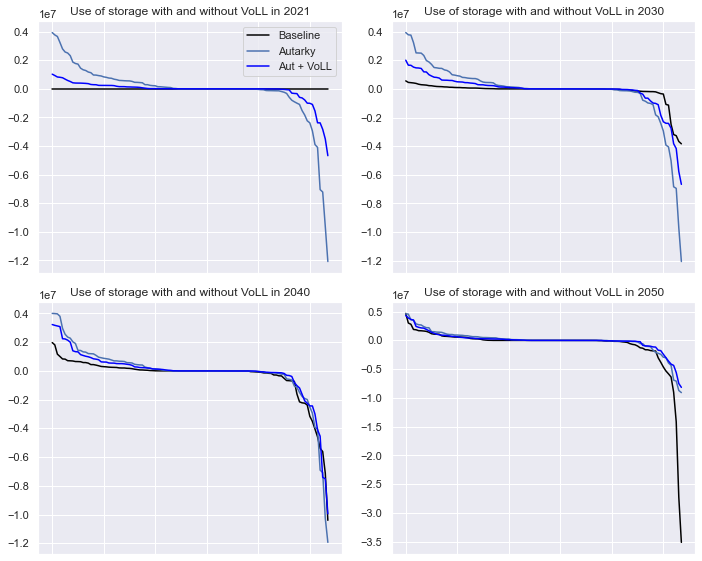

In [37]:
# Duration curve of storage use

fig,ax=plt.subplots(2,2,figsize=(10,8)) 
elStorageBL[elStorageBL['MY']==2021].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,0],color='black',label='Baseline')
elStorageA[elStorageA['MY']==2021].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,0],label='Autarky')
elStorageAV[elStorageAV['MY']==2021].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,0],color='blue',label='Aut + VoLL')
ax[0,0].legend()
ax[0,0].set_title("Use of storage with and without VoLL in 2021")

elStorageBL[elStorageBL['MY']==2030].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,1],color='black',label='Baseline')
elStorageA[elStorageA['MY']==2030].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,1],label='Autarky')
elStorageAV[elStorageAV['MY']==2030].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[0,1],color='blue',label='Aut + VoLL')
ax[0,1].set_title("Use of storage with and without VoLL in 2030")

elStorageBL[elStorageBL['MY']==2040].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,0],color='black',label='Baseline')
elStorageA[elStorageA['MY']==2040].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,0],label='Autarky')
elStorageAV[elStorageAV['MY']==2040].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,0],color='blue',label='Aut + VoLL')
ax[1,0].set_title("Use of storage with and without VoLL in 2040")

elStorageBL[elStorageBL['MY']==2050].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,1],color='black',label='Baseline')
elStorageA[elStorageA['MY']==2050].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,1],label='Autarky')
elStorageAV[elStorageAV['MY']==2050].sort_values(by='Val',ascending=False)['Val'].plot(ax=ax[1,1],color='blue',label='Aut + VoLL')
ax[1,1].set_title("Use of storage with and without VoLL in 2050")

plt.ylabel=("kWh")
for ax in ax.flat:
    ax.set_xticklabels("")
    ax.set_xlabel(None)
plt.tight_layout()

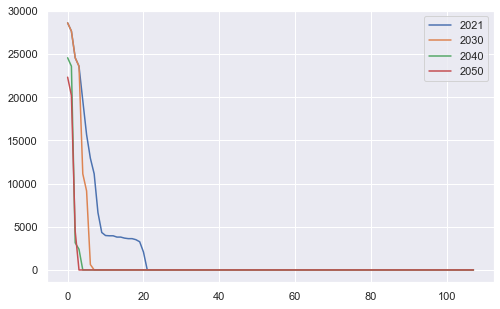

In [38]:
#Duration curve of lost load

fig, ax=plt.subplots(figsize=(8,5))
LostLoad[LostLoad['MY']==2021].sort_values(by='Val',ascending=False).reset_index()['Val'].plot(ax=ax, label='2021')
LostLoad[LostLoad['MY']==2030].sort_values(by='Val',ascending=False).reset_index()['Val'].plot(ax=ax, label='2030')
LostLoad[LostLoad['MY']==2040].sort_values(by='Val',ascending=False).reset_index()['Val'].plot(ax=ax, label='2040')
LostLoad[LostLoad['MY']==2050].sort_values(by='Val',ascending=False).reset_index()['Val'].plot(ax=ax, label='2050')
#ax.set_xticklabels("")
#ax.set_xlabel(None)
ax.legend()

In [39]:
imports[imports['EC']=='el']['Val']

0       12634.466551
2         796.056814
3         914.031746
4         818.302250
5        1487.284486
           ...      
675     11232.546253
677      4775.973448
679      5017.754484
681      5072.716682
683    117804.938425
Name: Val, Length: 306, dtype: float64

In [50]:
LostLoad

,MY,TS,season,day,hour,Val
0,2021,2021_sp_wd_1,sp,wd,1,0.0
1,2021,2021_sp_wd_6,sp,wd,6,0.0
2,2021,2021_sp_wd_8,sp,wd,8,0.0
3,2021,2021_sp_wd_10,sp,wd,10,0.0
4,2021,2021_sp_wd_12,sp,wd,12,0.0
...,...,...,...,...,...,...
427,2050,2050_wi_ex_12,wi,ex,12,0.0
428,2050,2050_wi_ex_14,wi,ex,14,0.0
429,2050,2050_wi_ex_16,wi,ex,16,0.0
430,2050,2050_wi_ex_18,wi,ex,18,0.0


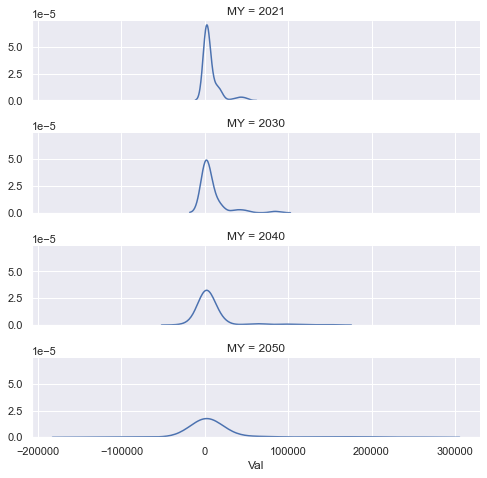

In [57]:
g = sns.FacetGrid(elImports, row="MY",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "Val")

### Electricity storage - 2021

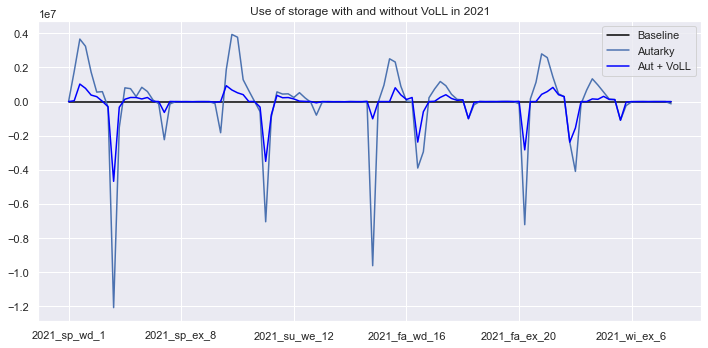

In [40]:
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageBL[elStorageBL['MY']==2021]['Val'].plot(ax=ax,color='black',label='Baseline')
elStorageA[elStorageA['MY']==2021]['Val'].plot(ax=ax,label='Autarky')
elStorageAV[elStorageAV['MY']==2021]['Val'].plot(ax=ax,color='blue',label='Aut + VoLL')
plt.legend()
plt.title("Use of storage with and without VoLL in 2021")
plt.ylabel=("kWh")
plt.xlabel(None)
plt.tight_layout()

### Electricity storage - 2030

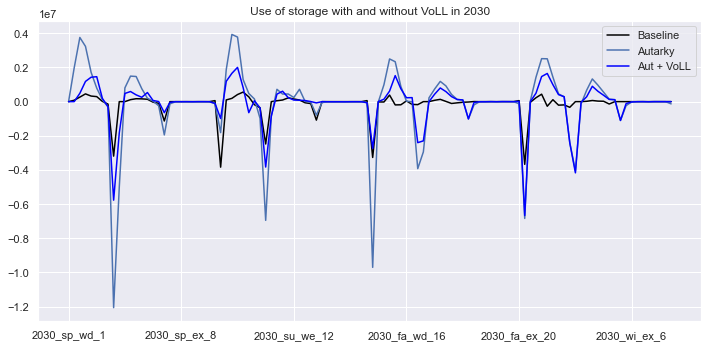

In [41]:
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageBL[elStorageBL['MY']==2030]['Val'].plot(ax=ax,color='black',label='Baseline')
elStorageA[elStorageA['MY']==2030]['Val'].plot(ax=ax,label='Autarky')
elStorageAV[elStorageAV['MY']==2030]['Val'].plot(ax=ax,color='blue',label='Aut + VoLL')
plt.legend()
plt.title("Use of storage with and without VoLL in 2030")
plt.ylabel=("kWh")
plt.xlabel(None)
plt.tight_layout()

### Electricity storage - 2040

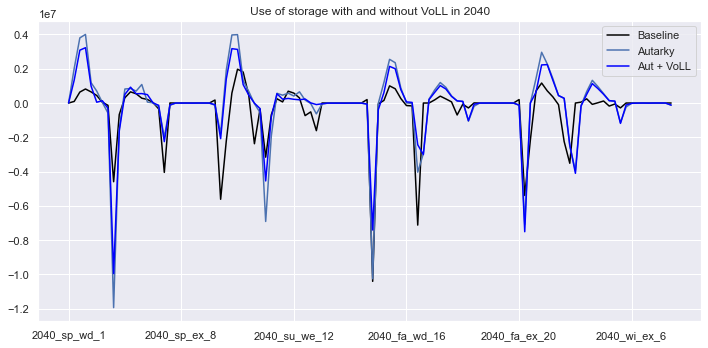

In [42]:
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageBL[elStorageBL['MY']==2040]['Val'].plot(ax=ax,color='black',label='Baseline')
elStorageA[elStorageA['MY']==2040]['Val'].plot(ax=ax,label='Autarky')
elStorageAV[elStorageAV['MY']==2040]['Val'].plot(ax=ax,color='blue',label='Aut + VoLL')
plt.legend()
plt.title("Use of storage with and without VoLL in 2040")
plt.ylabel=("kWh")
plt.xlabel(None)
plt.tight_layout()

### Electricity storage - 2050

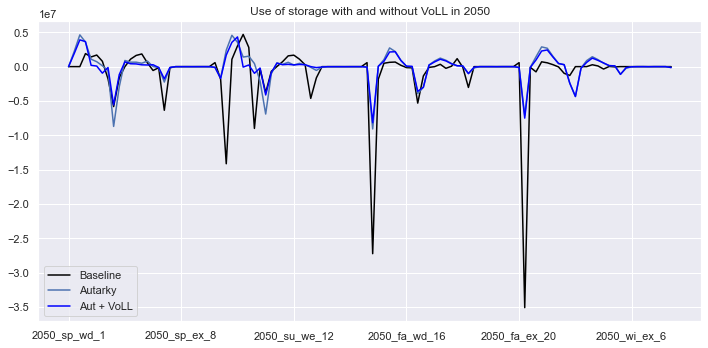

In [43]:
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageBL[elStorageBL['MY']==2050]['Val'].plot(ax=ax,color='black',label='Baseline')
elStorageA[elStorageA['MY']==2050]['Val'].plot(ax=ax,label='Autarky')
elStorageAV[elStorageAV['MY']==2050]['Val'].plot(ax=ax,color='blue',label='Aut + VoLL')
plt.legend()
plt.title("Use of storage with and without VoLL in 2050")
plt.ylabel=("kWh")
plt.xlabel(None)
plt.tight_layout()

### Electricity storage - Baseline

Text(0.5, 0, '')

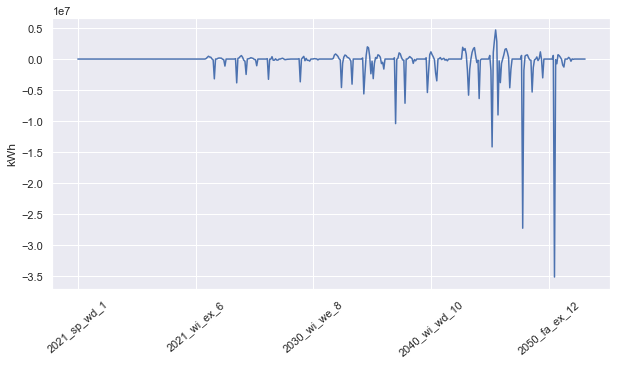

In [44]:
#Use of electricity storage - baseline
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageBL.Val.plot()
ax.tick_params(axis='x',rotation=40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_xticklabels(season_labs_2050)
ax.set_ylabel("kWh")
ax.set_xlabel("")

### Electricity storage - Autarky

Text(0.5, 0, '')

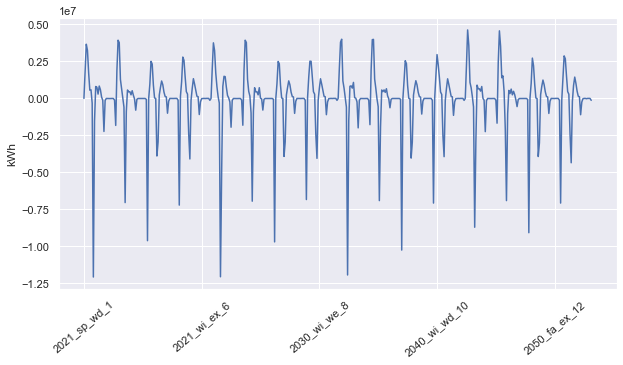

In [45]:
#Use of electricity storage - autarky
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageA.Val.plot()
ax.tick_params(axis='x',rotation=40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_xticklabels(season_labs_2050)
ax.set_ylabel("kWh")
ax.set_xlabel("")

### Electricity storage - Autarky VoLL

Text(0.5, 0, '')

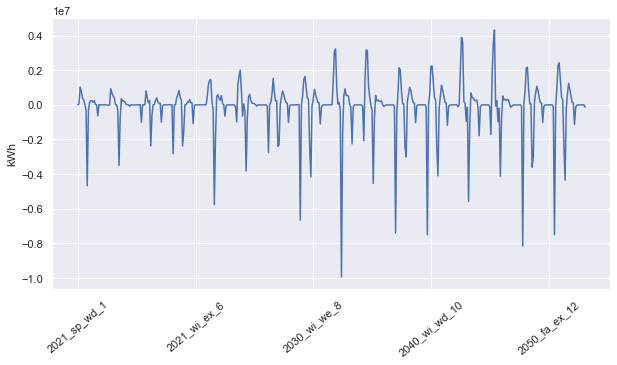

In [46]:
#Use of electricity storage - autarky with VoLL
fig,ax=plt.subplots(figsize=(10,5)) 
elStorageAV.Val.plot()
ax.tick_params(axis='x',rotation=40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_xticklabels(season_labs_2050)
ax.set_ylabel("kWh")
ax.set_xlabel("")

### Use of VoLL

Text(0.5, 0, '')

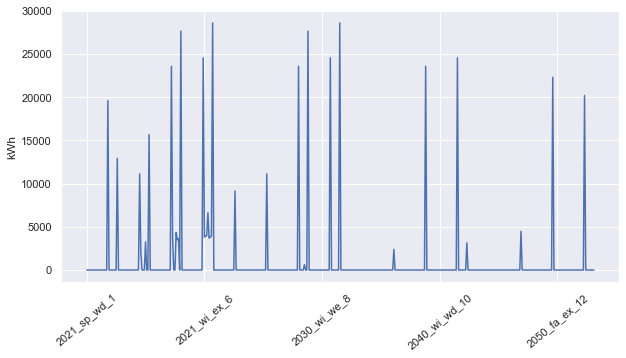

In [47]:
#Electricity imports
fig,ax=plt.subplots(figsize=(10,5)) 
LostLoad.set_index('TS').Val.plot()
ax.tick_params(axis='x',rotation=40)
#ax.set_xticklabels(season_labs)
ax.set_ylabel("kWh")
ax.set_xlabel("")

In [48]:
#Further analyze VoLL timeseries

### Electricity imports

Text(0.5, 0, '')

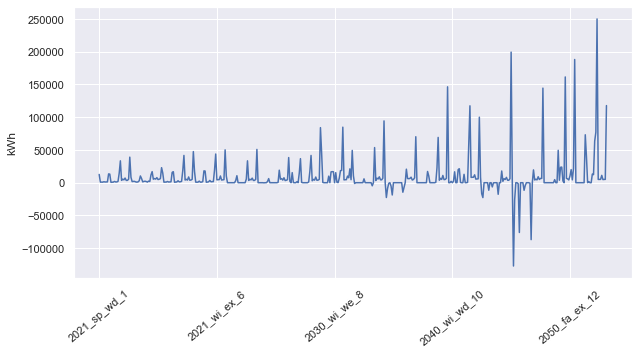

In [49]:
#Electricity imports
fig,ax=plt.subplots(figsize=(10,5)) 
elImports.set_index('TS').Val.plot()
ax.tick_params(axis='x',rotation=40)
#ax.set_xticklabels(season_labs)
ax.set_ylabel("kWh")
ax.set_xlabel("")